In [346]:
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [282]:
# Загружаем данные (предполагаем, что они в формате CSV)
df = pd.read_csv('comments.csv') 
df.head()


,un,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2


In [283]:
df.columns

Index(['un', 'Video ID', 'Comment', 'Likes', 'Sentiment'], dtype='object')

In [284]:
df.drop(columns=['un', 'Likes'], inplace=True)
df.rename(columns={'Sentiment': 'mark'}, inplace=True)
df.head()

,Video ID,Comment,mark
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,1
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,2
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",2


In [285]:
size_1 = int(len(df) * 0.75)  # 75% данных от общего размера
size_2 = int(len(df) * 0.10)  # 10% данных от общего размера
size_3 = int(len(df) * 0.05)  # 5% данныхот общего размера

In [294]:
part_1 = df.iloc[:size_1] # часть данных с отметкой
part_2 = df.iloc[size_1:size_1+size_2] # 10% для разметки c textblob
part_3 = df.iloc[size_1+size_2:size_1+size_2+size_2] # 10% для разметки по правилам
part_4 = df.iloc[size_1 + size_2 + size_2:size_1 + size_2 + size_2 + 50] # 5% для разметки в Label Studio

In [295]:
df.shape

(18409, 3)

In [296]:
df.head()

,Video ID,Comment,mark
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,1
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,2
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",2


In [297]:
part_1.shape[0], part_2.shape[0], part_3.shape[0], part_4.shape[0]

(13806, 1840, 1840, 50)

Проведём разметку с textblob

In [220]:
part_2.head()

,Video ID,Comment,mark
13806,YO244P1e9QM,Bio teachers reading the comments 👁💧👄💧👁,1
13807,YO244P1e9QM,Really like how you guys explain the major poi...,2
13808,YO244P1e9QM,I wish my biology teacher explained biomolecul...,1
13809,YO244P1e9QM,You have earned another subscriber! This is bo...,2
13810,YO244P1e9QM,Can you make videos about the structures of ea...,2


In [315]:
def get_mark_textblob(marked):
    if marked > 0:
        return 2  # Положительный отзыв
    elif marked == 0:
        return 1  # Нейтральный отзыв
    return 0  # Отрицательный отзыв


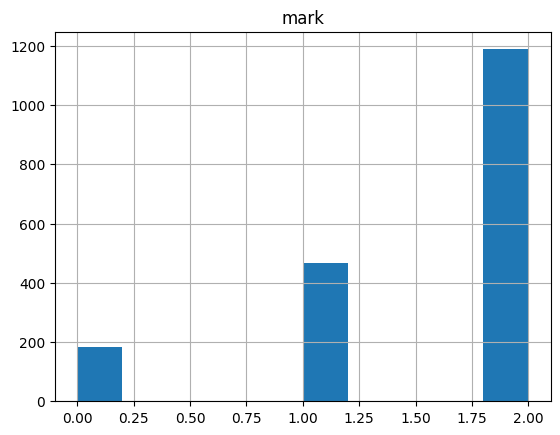

In [316]:
part_2.hist();

Разметка с помощью заданных правил

In [223]:
positive_words = ['good', 'great', 'amazing', 'recommend', 'creative', 'fine', 'comfortable', 'pretty', 
                 'as well', 'fantastically', 'terrific', 'love', 'like', 'easy', 'winner', 'perfect', 'nice',
                 'flawlessly', 'happy', 'fast', 'marvel', 'powerful', 'solve', 'bright', 'surprisingly',
                 'excellent', 'outstanding', 'wonderful', 'superb', 'delightful', 'success', 'impressive', 
                 'brilliant', 'charming', 'genius', 'pleasure', 'vibrant', 'thrilling', 'exceptional', 'joyful',
                 'breathtaking', 'captivating', 'sweet', 'magical', 'gorgeous', 'exquisite', 'remarkable']

part_3.head()

,Video ID,Comment,mark
15646,573n5HGVo94,Was very interested in Redfall when announced....,2
15647,573n5HGVo94,"Gamepass is such an amazing service,i mean at ...",2
15648,573n5HGVo94,The reason they said large and open space inst...,1
15649,573n5HGVo94,"There is no ""loop hole"" for how Death Strandin...",0
15650,573n5HGVo94,Redfall is going to be sick 🔥🔥,2


array([[<Axes: title={'center': 'mark'}>]], dtype=object)

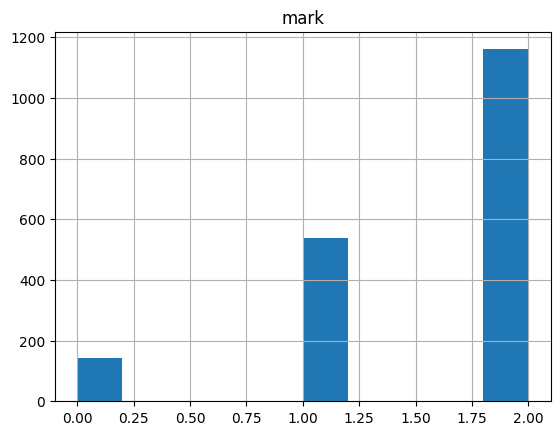

In [317]:
def get_sentiment_by_rule(review):
    words = nltk.word_tokenize(review.lower())
    num_positive = sum([1 for word in words if word in positive_words])
    
    if num_positive > 0:
        return 2  # Положительный отзыв
    elif num_positive == 0:
        return 1  # Нейтральный отзыв
    return 0  # Отрицательный отзыв (можно оставить, если у вас есть такая логика)

part_3.hist()

Разметка данных с помощью Label Studio

In [298]:
part_4 = part_4[['Comment']]
part_4.head()

,Comment
17486,For every Wishlist I'll do another push-up\nht...
17487,You have achieved more in 2 years that a whole...
17488,Congrats on two years of exciting development!...
17489,Congrats man on your 2 years! You're a legend!
17490,Dude honestly this just looks amazing and I th...


In [299]:
part_4.to_csv('project4.csv', index=False)

![alt text](LAbel.png)
![alt text](LAbel2.png)

In [318]:
part_44 = pd.read_csv('project44.csv')
part_4 = part_44[['Comment', 'sentiment']]
part_4.head()

,Comment,sentiment
0,For every Wishlist I'll do another push-up\r\n...,2
1,You have achieved more in 2 years that a whole...,2
2,Congrats on two years of exciting development!...,2
3,Congrats man on your 2 years! You're a legend!,2
4,Dude honestly this just looks amazing and I th...,2


In [319]:
part_4.rename(columns={'sentiment': 'mark'}, inplace=True)

C:\Temp\ipykernel_13352\2821916658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_4.rename(columns={'sentiment': 'mark'}, inplace=True)


In [320]:
part_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  50 non-null     object
 1   mark     50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


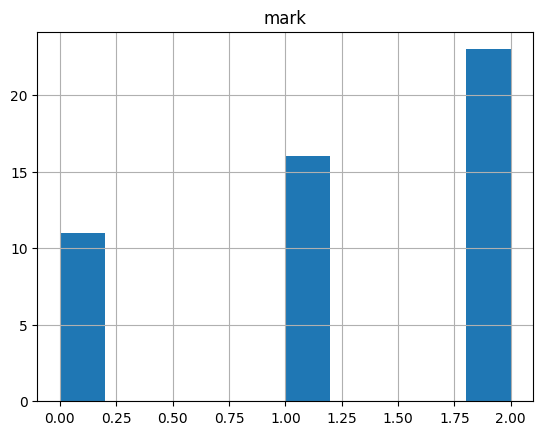

In [321]:
part_4.hist();

Объединим все части датасета

In [322]:
data = pd.concat([part_1, part_2, part_3, part_4])
data.shape

(17536, 3)

In [323]:
data.reset_index(drop=True, inplace=True)
data.head()

,Video ID,Comment,mark
0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,1
1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,0
2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,2
3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,0
4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",2


Обучение модели

In [328]:
data = data.dropna(subset=['Comment', 'mark'])


In [329]:
from sklearn.preprocessing import LabelEncoder
    
encoder = LabelEncoder()
data['mark'] = encoder.fit_transform(data['mark'])

In [330]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
    

(13152,) (13152,)
(4384,) (4384,)


In [331]:
X_train, X_test, y_train, y_test = train_test_split(data['Comment'], data['mark'], test_size=0.2, random_state=42)

In [341]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', LogisticRegression(max_iter=1000))
])

In [342]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', LogisticRegression(max_iter=1000))])

In [343]:
predictions = pipeline.predict(X_test)

In [347]:
accuracy = accuracy_score(y_test, predictions)
print(f'Точность модели равна {accuracy}')

Точность модели равна 0.7456515540347876


In [348]:
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.29      0.41       451
           1       0.62      0.58      0.60       911
           2       0.79      0.91      0.85      2145

    accuracy                           0.75      3507
   macro avg       0.70      0.59      0.62      3507
weighted avg       0.73      0.75      0.73      3507

